# MNIST 실습
- MNIST dataset: 28x28 크기의 흑백 손글씨 이미지로, 0 ~ 9가 적혀있는 데이터셋
- MNIST는 손글씨 사진과 어떤 숫자를 의미하는지에 대한 label의 pair들로 구성

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
ROOT_DIR = "../data"

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

- 우리는 PyTorch model을 사용할 것이기 때문에 손글씨 사진들을 모두 tensor로 변환해야합니다.
- 이러한 부가적인 변환들은 `torchvision.transforms`에서 제공하고 있으며, `torchvision.datasets.MNIST`에서 `transform` 인자로 받을 수 있습니다.
- 우리는 단순히 사진을 tensor로 바꾸고 싶기 때문에 `transforms.ToTensor()` transformation을 넘겨줍니다.

In [3]:
trainset = torchvision.datasets.MNIST(
    root=ROOT_DIR, train=True, download=True, transform=transform
)

In [4]:
print("Size of trainset:", len(trainset))
# (image(tensor), 숫자(number)), (image(tensor), 숫자(number)), ...
print("trainset[0][0].shape:", trainset[0][0].shape, trainset[0][1])

Size of trainset: 60000
trainset[0][0].shape: torch.Size([1, 28, 28]) 5


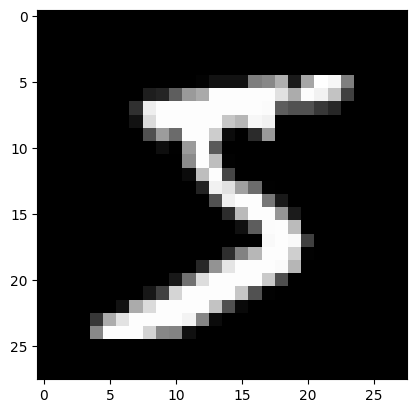

In [5]:
from matplotlib import pyplot as plt

plt.imshow(trainset[0][0][0], cmap="gray")

In [6]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=64,  # 60,000 개의 데이터를 64 개씩 나눔
    shuffle=True,  # 나눈 데이터 덩어리를 섞는 것
)

In [7]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
# [batch_size, channel, width, height], [batch_size 만큼의 레이블 수]
print("images.shape:", images.shape, "labels.shape:", labels.shape)

images.shape: torch.Size([64, 1, 28, 28]) labels.shape: torch.Size([64])


In [8]:
class SimpleModel(nn.Module):
    def __init__(self, input_dim, n_dim):
        super(SimpleModel, self).__init__()

        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, 1)

        self.activation = nn.ReLU()

    def forward(self, x):
        # Linear 의 input 으로 넣을 수 있도록 변경
        # Linear 의 input: (n, d), x: (n, 1, 28, 28) -> x: (n, 1 * 28 * 28)
        x = torch.flatten(x, start_dim=1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        return x

In [14]:
from torch.optim import SGD

lr = 0.001
model = SimpleModel(1 * 28 * 28, 1024)
optimizer = SGD(model.parameters(), lr=lr)

In [15]:
n_epochs = 100

for epoch in range(n_epochs):
    total_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        model.zero_grad()

        inputs, labels = data
        preds = model(inputs)
        loss = (preds[:, 0] - labels).pow(2).mean()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch {epoch:3d} | Loss: {total_loss}")

     Epoch 0 | Loss: 4683.68086206913
     Epoch 1 | Loss: 2517.268378019333
     Epoch 2 | Loss: 1810.873281776905
     Epoch 3 | Loss: 1432.889240205288
     Epoch 4 | Loss: 1208.6235261261463
     Epoch 5 | Loss: 1063.11292091012
     Epoch 6 | Loss: 964.9297283887863
     Epoch 7 | Loss: 890.4148194789886
     Epoch 8 | Loss: 828.8608049154282
     Epoch 9 | Loss: 779.3048553913832
     Epoch 10 | Loss: 736.6842475384474
     Epoch 11 | Loss: 703.0230737477541
     Epoch 12 | Loss: 668.1105719506741
     Epoch 13 | Loss: 638.3018149137497
     Epoch 14 | Loss: 614.8205677568913
     Epoch 15 | Loss: 589.1065252125263
     Epoch 16 | Loss: 567.9177693128586
     Epoch 17 | Loss: 545.0938456952572
     Epoch 18 | Loss: 528.9880058765411
     Epoch 19 | Loss: 509.05868746340275
     Epoch 20 | Loss: 494.7107842564583
     Epoch 21 | Loss: 480.5525456368923
     Epoch 22 | Loss: 462.704416975379
     Epoch 23 | Loss: 451.7130677551031
     Epoch 24 | Loss: 438.71140257269144
     Epoch